# Prototype Notebook

## Required Inputs
1. Directory of planet images
2. Single LandSat image

## What's applied in this notebook
1. The landsat image is convert from float64 to unit16 & nodata values are set to 0
2. Cloud masking is applied to planet + landsat
3. All the planet images are co-registered via local co-reg to the landsat image
4. The bands in the planet image are re-rodered from BGRNIR to RGBNIR to match the expected model input format
5. The values in the planet tiff are scaled to be 0 - 255 to match the expected model input format
6. The model is applied to the planet image
7. Shorelines are extracted from the segmentation

## Future Upgrades
- Run the good/bad filters on the planet imagery
- Filter out planet images that less than **threshold** size of the ROI
- Filter out planet images by percentage of cloud and cloud shadow coverage
- UPdate workflows to utilize Dask
- Have a function that gets the landsat image with the highest georef and lowest RMSE

In [1]:
import geopandas as gpd

config_gdf = gpd.read_file(r"C:\development\coastseg-planet\CoastSeg-Planet\landsat\santa_cruz_boardwalk\ID_1_datetime05-21-24__01_55_42\config_gdf.geojson")
config_gdf

,id,type,geometry
0,1,roi,"POLYGON ((-122.02727 36.96900, -121.99925 36.9..."


In [5]:
roi = config_gdf[config_gdf['type'] == 'roi']
roi.to_file(r"C:\development\coastseg-planet\CoastSeg-Planet\landsat\santa_cruz_boardwalk\ID_1_datetime05-21-24__01_55_42\roi.geojson", driver='GeoJSON')
roi.to_file(r"C:\development\coastseg-planet\CoastSeg-Planet\boardwalk\roi.geojson", driver='GeoJSON')

In [1]:
import coastseg_planet

## Sample Data for Demo

In [2]:
sample_direc = r'C:\development\coastseg-planet\CoastSeg-Planet\output_zoo'
file_to_seg = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230403_101844_81_247d_3B_AnalyticMS_toar_clip.tif"
landsat_image = r''

# Prepare the LandSat Image 
Convert from float64 to unit16 & nodata values are set to 0

In [3]:
from coastseg_planet.processing import convert_from_float_to_unit16, create_tiled_raster

# Source file path : input landsat image that's cloud free
input_path= r"C:\development\coastseg-planet\CoastSeg-Planet\2023-02-14-10-33-43_L8_ID_mqq51_datetime05-06-24__06_47_51_ms.tif"
# Output file path
landsat_processed_path = r"C:\development\coastseg-planet\CoastSeg-Planet\2023-02-14-10-33-43_L8_ID_mqq51_processed.tif"

landsat_processed_path =convert_from_float_to_unit16(input_path, landsat_processed_path)
landsat_processed_path = create_tiled_raster(input_path, landsat_processed_path)
landsat_processed_path

output_path: C:\development\coastseg-planet\CoastSeg-Planet\2023-02-14-10-33-43_L8_ID_mqq51_processed.tif
Created a new tiled raster file with block size 256x256 at C:\development\coastseg-planet\CoastSeg-Planet\2023-02-14-10-33-43_L8_ID_mqq51_processed.tif


'C:\\development\\coastseg-planet\\CoastSeg-Planet\\2023-02-14-10-33-43_L8_ID_mqq51_processed.tif'

# Apply Cloud Mask to LandSat

In [4]:
# do this later....

# Apply Cloud Masks to Planet
Create a cloud and shadow mask for each image in the directory of planet images

In [5]:
from coastseg_planet.masking import apply_cloudmask_to_dir
# apply cloud mask to directory of planet images and generate cloud masks in that directory for each tif
input_dir = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene"
apply_cloudmask_to_dir(input_dir)

Creating cloud and shadow mask from C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102117_56_2488_3B_udm2_clip.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102117_56_2488_3B_udm2_clip_combined_mask_bool.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102117_56_2488_3B_udm2_clip_combined_mask.tif
Creating cloud and shadow mask from C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102119_76_2488_3B_udm2_clip.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230401_102119_76_2488_3B_udm2_clip_combined_mask_bool.tif
Saving combined mask to C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b

# Coregister all the planet images to the landsat image
All the planet images are co-registered via local co-reg to the landsat image

In [6]:
from coastseg_planet.coregister import global_coregister_gw,get_cpus

# try to coregister two planet images together that have clouds now that we can mask out clouds

REFERENCE = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230403_101844_81_247d_3B_AnalyticMS_toar_clip.tif"
INFILE = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230412_094432_88_2439_3B_AnalyticMS_toar_clip.tif"
TARGET_CLOUD_MASK = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230412_094432_88_2439_3B_udm2_clip_combined_mask.tif"

outfile=r"C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregister_with_combined_mask.tif"

num_cpus = get_cpus()
coregistered_planet_path = global_coregister_gw(REFERENCE, INFILE, outfile, target_cloud_mask = TARGET_CLOUD_MASK,num_cpus=num_cpus) 
# this isn't working and I'll need to figure out why
# coregistered_planet_path = global_coregister_gw(landsat_processed_path, INFILE, outfile, target_cloud_mask = TARGET_CLOUD_MASK,num_cpus=num_cpus) 

coregistered_planet_path


Number of CPUs available: 20


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Calculating footprint polygon and actual data corner coordinates for reference image...
Bounding box of calculated footprint for reference image:
	(662619.0, 5922558.0, 667092.0, 5927034.0)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(662619.0, 5922558.0, 667092.0, 5927034.0)
Matching window position (X,Y): 664855.4990364996/5924794.563420993
No clear match found yet. Jumping to iteration 2...
input shifts:  -41 -3
No clear match found yet. Jumping to iteration 3...
input shifts:  0 59
Detected integer shifts (X/Y):                            0/0
Detected subpixel shifts (X/Y):                           0.10465466820119154/0.3203018290162849
Calculated total shifts in fft pixel units (X/Y):         0.10465466820119154/0.3203018290162849
Calculated total shifts in reference pixel units (X/Y):   0.10465466820119154/0.3203018290162849
Calculated total shifts in target pixel units (X/Y):      0.10465466820119154/0.3203018290162849
Calculated map shifts (X,Y):				  0.31396400462836027/-0.9609054867178202
Calculated absolute shift vector length in map units:     1.0108970029665179
Calculated angle of shift vector in degrees from North:   341.9058356051124
Ori

12:15:10:WARNING:755:io.save:The file C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregister_with_combined_mask.tif already exists.


<xarray.DataArray 'array-1d77f6bd1eb563e5e7eb04fec63aad37' (band: 4, y: 1492,
                                                            x: 1491)> Size: 71MB
dask.array<array, shape=(4, 1492, 1491), dtype=float64, chunksize=(4, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int32 16B 1 2 3 4
  * y        (y) float64 12kB 5.927e+06 5.927e+06 ... 5.923e+06 5.923e+06
  * x        (x) float64 12kB 6.626e+05 6.626e+05 ... 6.671e+05 6.671e+05
Attributes: (12/16)
    transform:           (3.0, 0.0, 662619.3139640046, 0.0, -3.0, 5927033.039...
    crs:                 32631
    res:                 (3.0, 3.0)
    is_tiled:            1
    nodatavals:          (0.0, 0.0, 0.0, 0.0)
    _FillValue:          0.0
    ...                  ...
    resampling:          nearest
    AREA_OR_POINT:       Area
    _data_are_separate:  0
    _data_are_stacked:   0
    x_shift_px:          0.10465466820119154
    y_shift_px:          0.3203018290162849


'C:\\development\\coastseg-planet\\20230412_094432_88_2439_3B_coregister_with_combined_mask.tif'

# Convert Planet Imagery to Compatible Format for Model
- reorder to bands to be  RGBNIR
- scale the values to be 0 - 255 

In [7]:
from coastseg_planet.processing import convert_planet_to_model_format

planet_model_img_path = coregistered_planet_path.replace('coregister_with_combined_mask.tif','coregistered_model_ready.tif')

planet_model_img_path= convert_planet_to_model_format(coregistered_planet_path,planet_model_img_path)
planet_model_img_path

red min: 0, red max: 3851
green min: 0, green max: 3654
blue min: 0, blue max: 3837
red min: 0, red max: 255
green min: 0, green max: 255
blue min: 0, blue max: 255


'C:\\development\\coastseg-planet\\20230412_094432_88_2439_3B_coregistered_model_ready.tif'

# Apply the Model to the Planet Imagery

In [8]:
from coastseg_planet.model import apply_model_to_image

apply_model_to_image(planet_model_img_path)

Version:  2.15.0
Eager mode:  True



Some layers from the model checkpoint at nvidia/mit-b0 were not used when initializing TFSegformerForSemanticSegmentation: ['classifier']
- This IS expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFSegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Processing image:  C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregistered_model_ready.tif
Output file:  C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregistered_model_ready_predseg.png
Output file:  C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregistered_model_ready_predseg.png
NC: 4, NDB: 3, TS: [512, 512], TTA: False, OT: False

saving segmentation results to C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregistered_model_ready_predseg.png
writing metadata to C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregistered_model_ready_res.npz


# Extract Shorelines from the Segmentation

In [9]:
from coastseg.extracted_shoreline import load_image_labels, load_merged_image_labels, remove_small_objects_and_binarize, get_indices_of_classnames, get_class_mapping
from coastseg import file_utilities

npz_file = r'C:\development\coastseg-planet\20230412_094432_88_2439_3B_coregistered_model_ready_res.npz'
model_card_path = r'C:\development\coastseg-planet\CoastSeg-Planet\output_zoo\coastseg_planet\coastseg_planet\config\model_card.yml'

weights_directory = r'C:\development\doodleverse\coastseg\CoastSeg\src\coastseg\downloaded_models\segformer_RGB_4class_8190958'

model_card_path = file_utilities.find_file_by_regex(
    weights_directory, r".*modelcard\.json$"
)

model_card_path

'C:\\development\\doodleverse\\coastseg\\CoastSeg\\src\\coastseg\\downloaded_models\\segformer_RGB_4class_8190958\\sat4class_rgb_512_v5_modelcard.json'

In [54]:
# get the water index from the model card
water_classes_indices = get_indices_of_classnames(
    model_card_path, ["water", "whitewater"]
)
# Sample class mapping {0:'water',  1:'whitewater', 2:'sand', 3:'rock'}
class_mapping = get_class_mapping(model_card_path)

# get the labels for water and land
land_mask = load_merged_image_labels(npz_file, class_indices=water_classes_indices)
all_labels = load_image_labels(npz_file)
min_beach_area = 10000
land_mask = remove_small_objects_and_binarize(land_mask, min_beach_area) 

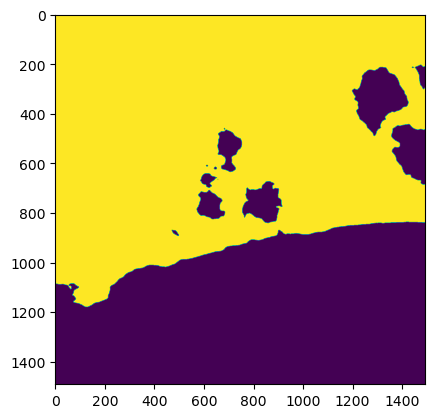

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(land_mask)
plt.show()

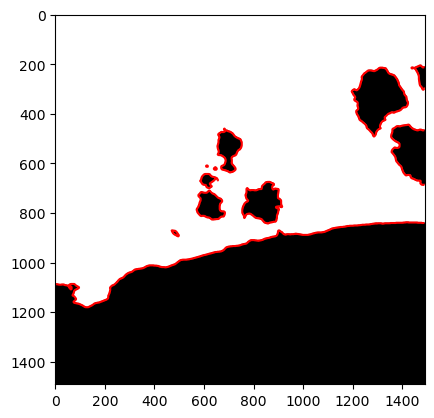

In [56]:
import matplotlib.pyplot as plt

plt.imshow(land_mask, cmap='gray')  # Display the land mask
plt.contour(land_mask, colors='r')  # Plot the contours in red
plt.show()

In [57]:
import numpy as np
import skimage.measure as measure
from typing import List

def process_contours(contours):
    """
    Remove contours that contain NaNs, usually these are contours that are in contact
    with clouds.

    Arguments:
    -----------
    contours: list of np.array
        image contours as detected by the function skimage.measure.find_contours

    Returns:
    -----------
    contours: list of np.array
        processed image contours (only the ones that do not contains NaNs)

    """

    # Remove contours that contain NaNs
    contours_nonans = [
        contour[~np.isnan(contour).any(axis=1)] for contour in contours
        if not np.isnan(contour).all(axis=1).any()
    ]

    # Filter out empty contours
    contours_nonans = [contour for contour in contours_nonans if len(contour) > 1]

    return contours_nonans

def simplified_find_contours(
    im_labels: np.array, cloud_mask: np.array=None, reference_shoreline_buffer: np.array=None
) -> List[np.array]:
    """Find contours in a binary image using skimage.measure.find_contours and processes out contours that contain NaNs.
    Parameters:
    -----------
    im_labels: np.nd.array
        binary image with 0s and 1s
    cloud_mask: np.array
        boolean array indicating cloud mask
    Returns:
    -----------
    processed_contours: list of arrays
        processed image contours (only the ones that do not contains NaNs)
    """
    # make a copy of the im_labels array as a float (this allows find contours to work))
    im_labels_masked = im_labels.copy().astype(float)
    # Apply the cloud mask by setting masked pixels to NaN
    if cloud_mask:
        im_labels_masked[cloud_mask] = np.NaN
    # only keep the pixels inside the reference shoreline buffer
    if reference_shoreline_buffer:
        im_labels_masked[~reference_shoreline_buffer] = np.NaN
    
    # 0 or 1 labels means 0.5 is the threshold
    contours = measure.find_contours(im_labels_masked, 0.5)

    # remove contour points that are NaNs (around clouds and nodata intersections)
    processed_contours = process_contours(contours)

    return processed_contours


try:
    contours = simplified_find_contours(
        land_mask
    )
except Exception as e:
    print(f"{e}\nCould not map shoreline for this image")
contours

[array([[ 211.5, 1490. ],
        [ 211. , 1489.5],
        [ 210.5, 1489. ],
        [ 211. , 1488.5],
        [ 211.5, 1488. ],
        [ 212. , 1487.5],
        [ 212.5, 1487. ],
        [ 212.5, 1486. ],
        [ 212.5, 1485. ],
        [ 212.5, 1484. ],
        [ 212.5, 1483. ],
        [ 212. , 1482.5],
        [ 211.5, 1482. ],
        [ 211. , 1481.5],
        [ 210.5, 1481. ],
        [ 210. , 1480.5],
        [ 209.5, 1480. ],
        [ 209. , 1479.5],
        [ 208.5, 1479. ],
        [ 208. , 1478.5],
        [ 207.5, 1478. ],
        [ 207. , 1477.5],
        [ 206.5, 1477. ],
        [ 206. , 1476.5],
        [ 205.5, 1476. ],
        [ 205. , 1475.5],
        [ 204.5, 1475. ],
        [ 204.5, 1474. ],
        [ 204.5, 1473. ],
        [ 204.5, 1472. ],
        [ 204.5, 1471. ],
        [ 205. , 1470.5],
        [ 205.5, 1470. ],
        [ 205.5, 1469. ],
        [ 206. , 1468.5],
        [ 206.5, 1468. ],
        [ 206.5, 1467. ],
        [ 207. , 1466.5],
        [ 20

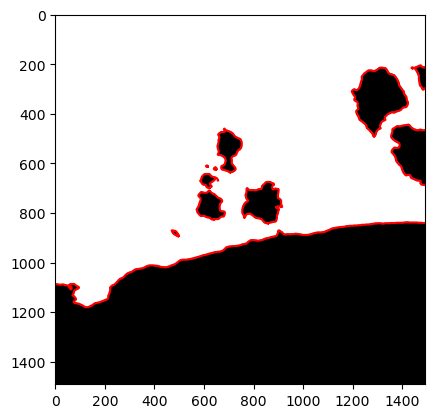

In [58]:
import matplotlib.pyplot as plt

# Display the land mask
plt.imshow(land_mask, cmap='gray')

# Plot each contour
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], color='r')

plt.show()

In [59]:
from osgeo import gdal
def get_georef(fn):
    data = gdal.Open(fn, gdal.GA_ReadOnly)
    georef = np.array(data.GetGeoTransform())
    return georef

# wil this be correct even after I changed the order of the bands and the block size of the plant image?
georef = get_georef(planet_model_img_path)
georef

array([ 6.62752044e+05,  3.00000000e+00,  0.00000000e+00,  5.92703499e+06,
        0.00000000e+00, -3.00000000e+00])

In [60]:
from osgeo import gdal, osr

def get_epsg_from_tiff(tiff_path):
    data = gdal.Open(tiff_path, gdal.GA_ReadOnly)
    projection = data.GetProjection()
    srs = osr.SpatialReference(wkt=projection)
    if srs.IsProjected:
        print(srs.GetAuthorityCode(None))
    else:
        print("No EPSG found")

image_epsg = get_epsg_from_tiff(planet_model_img_path)
image_epsg 

32631


In [97]:
from coastsat import SDS_tools
import numpy as np
from shapely.geometry import LineString

def process_shoreline(
    contours, cloud_mask,  georef, image_epsg, settings, **kwargs
):
    # convert pixel coordinates to world coordinates
    contours_world = SDS_tools.convert_pix2world(contours, georef)
    # convert world coordinates to desired spatial reference system
    contours_epsg = SDS_tools.convert_epsg(
        contours_world, image_epsg, settings["output_epsg"]
    )

    # 1. Remove contours that have a perimeter < min_length_sl (provided in settings dict)
    # this enables to remove the very small contours that do not correspond to the shoreline
    contours_long = []
    for l, wl in enumerate(contours_epsg):
        coords = [(wl[k, 0], wl[k, 1]) for k in range(len(wl))]
        a = LineString(coords)  # shapely LineString structure
        print(a.length)
        if a.length >= settings["min_length_sl"]:
            contours_long.append(wl)
    # format points into np.array
    x_points = np.array([])
    y_points = np.array([])
    for k in range(len(contours_long)):
        x_points = np.append(x_points, contours_long[k][:, 0])
        y_points = np.append(y_points, contours_long[k][:, 1])
    contours_array = np.transpose(np.array([x_points, y_points]))

    shoreline = contours_array


    print(
        f"Number of shorelines before removing shorelines < {settings['min_length_sl']}m: {len(contours_epsg)} shorelines. Number of shorelines after filtering shorelines: {len(contours_long)} shorelines"
    )

    if len(shoreline) == 0:
        return shoreline

    # 2. Remove any shoreline points that are close to cloud pixels (effect of shadows)
    if np.sum(np.sum(cloud_mask)) > 0:
        # get the coordinates of the cloud pixels
        idx_cloud = np.where(cloud_mask)
        idx_cloud = np.array(
            [(idx_cloud[0][k], idx_cloud[1][k]) for k in range(len(idx_cloud[0]))]
        )
        # convert to world coordinates and same epsg as the shoreline points
        coords_cloud = SDS_tools.convert_epsg(
            SDS_tools.convert_pix2world(idx_cloud, georef),
            image_epsg,
            settings["output_epsg"],
        )[:, :-1]
        # only keep the shoreline points that are at least 30m from any cloud pixel
        idx_keep = np.ones(len(shoreline)).astype(bool)
        for k in range(len(shoreline)):
            if np.any(
                np.linalg.norm(shoreline[k, :] - coords_cloud, axis=1)
                < settings["dist_clouds"]
            ):
                idx_keep[k] = False
        shoreline = shoreline[idx_keep]
    
    # if np.sum(np.sum(no_data)) > 0:
    #     # get the coordinates of the cloud pixels
    #     idx_cloud = np.where(no_data)
    #     idx_cloud = np.array(
    #         [(idx_cloud[0][k], idx_cloud[1][k]) for k in range(len(idx_cloud[0]))]
    #     )
    #     # convert to world coordinates and same epsg as the shoreline points
    #     coords_cloud = SDS_tools.convert_epsg(
    #         SDS_tools.convert_pix2world(idx_cloud, georef),
    #         image_epsg,
    #         settings["output_epsg"],
    #     )[:, :-1]
    #     # only keep the shoreline points that are at least 30m from any nodata pixel
    #     idx_keep = np.ones(len(shoreline)).astype(bool)
    #     for k in range(len(shoreline)):
    #         if np.any(np.linalg.norm(shoreline[k, :] - coords_cloud, axis=1) < 30):
    #             idx_keep[k] = False
    #     shoreline = shoreline[idx_keep]


    return shoreline

In [111]:
from coastsat import SDS_tools
import numpy as np
from shapely.geometry import LineString

def process_shoreline(contours, cloud_mask, georef, image_epsg, settings, **kwargs):
    # Convert pixel coordinates to world coordinates
    contours_world = SDS_tools.convert_pix2world(contours, georef)
    # Convert world coordinates to desired spatial reference system
    contours_epsg = SDS_tools.convert_epsg(contours_world, image_epsg, settings["output_epsg"])

    # 1. Remove contours that have a perimeter < min_length_sl (provided in settings dict)
    contours_long = []
    for wl in contours_epsg:
        a = LineString(wl)  # shapely LineString structure
        if a.length >= settings["min_length_sl"]:
            contours_long.append(wl)

    print(
        f"Number of shorelines before removing shorelines < {settings['min_length_sl']}m: {len(contours_epsg)} shorelines. "
        f"Number of shorelines after filtering shorelines: {len(contours_long)} shorelines"
    )

    if len(contours_long) == 0:
        return np.array([])  # Return empty array if no contours remain

    # 2. Remove any shoreline points that are close to cloud pixels (effect of shadows)
    if np.any(cloud_mask):
        # Get the coordinates of the cloud pixels
        idx_cloud = np.transpose(np.where(cloud_mask))
        # Convert to world coordinates and the same EPSG as the shoreline points
        coords_cloud = SDS_tools.convert_epsg(
            SDS_tools.convert_pix2world(idx_cloud, georef),
            image_epsg,
            settings["output_epsg"]
        )[:, :-1]

        filtered_contours = []
        for segment in contours_long:
            idx_keep = np.ones(len(segment), dtype=bool)
            for k in range(len(segment)):
                if np.any(np.linalg.norm(segment[k, :] - coords_cloud, axis=1) < settings["dist_clouds"]):
                    idx_keep[k] = False

            filtered_segment = segment[idx_keep]
            filtered_contours.append(filtered_segment)

        contours_long = filtered_contours

    # 3. Remove contours that have become too short after cloud distance filtering
    final_contours = []
    for segment in contours_long:
        if len(segment) > 1:  # Ensure there are enough points to form a line
            a = LineString(segment)
            if a.length >= settings["min_length_sl"]:
                final_contours.append(segment)

    return final_contours



In [127]:
settings = {
    'output_epsg': 32631,
    'min_length_sl': 100,
    'dist_clouds': 50,
}

# planet_cloud_mask = read_planet_tiff(TARGET_CLOUD_MASK,[1])
# planet_RGB = read_planet_tiff(planet_model_img_path,[1,2,3])

# shoreline = process_shoreline(contours,  georef, image_epsg, settings)
image_epsg = 32631

# Convert pixel coordinates to world coordinates
contours_world = SDS_tools.convert_pix2world(contours, georef)
# Convert world coordinates to desired spatial reference system
contours_epsg = SDS_tools.convert_epsg(contours_world, image_epsg, settings["output_epsg"])
# print(f"shape of contours_epsg: {contours_epsg.shape}")
print(f"Lenght of contours_epsg: {len(contours_epsg)})")
print(f"Lenght of contours_epsg: {len(contours_epsg[0])})")
print(f"Lenght of contours_epsg: {len(contours_epsg[0][0])})")
print(f"shape of contours_epsg: {contours_epsg[0].shape}")
print(f"contours_epsg[0]: {contours_epsg[0]}")
print(f"contours_epsg[0]: {type(contours_epsg[0])}")
print(f"contours_epsg[0][0]: {contours_epsg[0][0]}")
print(f"contours_epsg[0][0]: {type(contours_epsg[0][0])}")

something
14
Lenght of contours_epsg: 14)
Lenght of contours_epsg: 199)
Lenght of contours_epsg: 3)
shape of contours_epsg: (199, 3)
contours_epsg[0]: [[ 667222.04426187 5926400.49131542       0.        ]
 [ 667220.54426187 5926401.99131542       0.        ]
 [ 667219.04426187 5926403.49131542       0.        ]
 [ 667217.54426187 5926401.99131542       0.        ]
 [ 667216.04426187 5926400.49131542       0.        ]
 [ 667214.54426187 5926398.99131542       0.        ]
 [ 667213.04426187 5926397.49131542       0.        ]
 [ 667210.04426187 5926397.49131542       0.        ]
 [ 667207.04426187 5926397.49131542       0.        ]
 [ 667204.04426187 5926397.49131542       0.        ]
 [ 667201.04426187 5926397.49131542       0.        ]
 [ 667199.54426187 5926398.99131542       0.        ]
 [ 667198.04426187 5926400.49131542       0.        ]
 [ 667196.54426187 5926401.99131542       0.        ]
 [ 667195.04426187 5926403.49131542       0.        ]
 [ 667193.54426187 5926404.99131542    

In [135]:
contours_long = []
for l, wl in enumerate(contours_epsg):
    coords = [(wl[k, 0], wl[k, 1]) for k in range(len(wl))]
    a = LineString(coords)  # shapely LineString structure
    # print(a.length)
    if a.length >= settings["min_length_sl"]:
        contours_long.append(wl)
# format points into np.array
x_points = np.array([])
y_points = np.array([])
for k in range(len(contours_long)):
    x_points = np.append(x_points, contours_long[k][:, 0])
    y_points = np.append(y_points, contours_long[k][:, 1])
contours_array = np.transpose(np.array([x_points, y_points]))
shoreline = contours_array
print(f"shape of contours_array: {contours_array.shape}")
contours_array[0]


shape of contours_array: (6385, 2)


array([ 667222.04426187, 5926400.49131542])

In [146]:
# get the coordinates of the cloud pixels
cloud_mask = planet_cloud_mask
cloud_mask = cloud_mask[:,:,0]
cloud_mask.shape

(1492, 1491)

In [147]:
# get the coordinates of the cloud pixels
cloud_mask = planet_cloud_mask
cloud_mask = cloud_mask[:,:,0]
cloud_mask.shape
idx_cloud = np.where(cloud_mask)
idx_cloud = np.array(
    [(idx_cloud[0][k], idx_cloud[1][k]) for k in range(len(idx_cloud[0]))]
)
# convert to world coordinates and same epsg as the shoreline points
coords_cloud = SDS_tools.convert_epsg(
    SDS_tools.convert_pix2world(idx_cloud, georef),
    image_epsg,
    settings["output_epsg"],
)[:, :-1]
# only keep the shoreline points that are at least 30m from any cloud pixel
idx_keep = np.ones(len(shoreline)).astype(bool)
for k in range(len(shoreline)):
    if np.any(
        np.linalg.norm(shoreline[k, :] - coords_cloud, axis=1)
        < settings["dist_clouds"]
    ):
        idx_keep[k] = False
shoreline = shoreline[idx_keep]

something
(124609, 2)


In [137]:
coords_cloud.shape

(124609, 2)

In [148]:
idx_cloud = np.where(cloud_mask)
print(idx_cloud)
print(idx_cloud[0].shape)
print(len(idx_cloud))
idx_cloud = np.array(
    [(idx_cloud[0][k], idx_cloud[1][k]) for k in range(len(idx_cloud[0]))]
)
print(idx_cloud.shape)

(array([ 461,  462,  462, ..., 1186, 1186, 1186], dtype=int64), array([1489, 1489, 1490, ...,    1,    2,    3], dtype=int64))
(124609,)
2
(124609, 2)


In [138]:
idx_cloud.shape

(124609, 2)

In [139]:
cloud_mask.shape

(1492, 1491, 1)

In [144]:
1492*1492

2226064

In [109]:
from coastsat import SDS_tools
import numpy as np
from shapely.geometry import LineString

def filter_contours_long(cloud_mask, georef, image_epsg, output_epsg, contours_long, dist_clouds):
    """
    Filters out points in contours_long that are within a specified distance from any cloud pixel.
    
    Parameters:
    cloud_mask (ndarray): Boolean array where True indicates cloud presence.
    georef (dict): Georeferencing information.
    image_epsg (int): EPSG code of the image.
    output_epsg (int): EPSG code for the output coordinates.
    contours_long (list of ndarray): List of arrays containing shoreline points (coordinates).
    dist_clouds (float): Distance threshold in meters for filtering points.
    
    Returns:
    list of ndarray: Filtered contours_long with points too close to clouds removed.
    """
    if np.any(cloud_mask):
        # Get the coordinates of the cloud pixels
        idx_cloud = np.transpose(np.where(cloud_mask))
        
        # Convert to world coordinates and the same EPSG as the shoreline points
        coords_cloud = SDS_tools.convert_epsg(
            SDS_tools.convert_pix2world(idx_cloud, georef),
            image_epsg,
            output_epsg
        )[:, :-1]
        
        filtered_contours = []
        for segment in contours_long:
            idx_keep = np.ones(len(segment), dtype=bool)
            for k in range(len(segment)):
                if np.any(np.linalg.norm(segment[k, :] - coords_cloud, axis=1) < dist_clouds):
                    idx_keep[k] = False
            filtered_segment = segment[idx_keep]
            if len(filtered_segment) > 0:
                filtered_contours.append(filtered_segment)
    
        return filtered_contours
    
    return contours_long

def process_shoreline(
    contours, cloud_mask,  georef, image_epsg, settings, **kwargs
):
    # convert pixel coordinates to world coordinates
    contours_world = SDS_tools.convert_pix2world(contours, georef)
    # convert world coordinates to desired spatial reference system
    contours_epsg = SDS_tools.convert_epsg(
        contours_world, image_epsg, settings["output_epsg"]
    )

    # 1. Remove contours that have a perimeter < min_length_sl (provided in settings dict)
    # this enables to remove the very small contours that do not correspond to the shoreline
    contours_long = []
    for l, wl in enumerate(contours_epsg):
        coords = [(wl[k, 0], wl[k, 1]) for k in range(len(wl))]
        a = LineString(coords)  # shapely LineString structure
        print(a.length)
        if a.length >= settings["min_length_sl"]:
            contours_long.append(wl)
            
            
            
    contours_long = filter_contours_long(cloud_mask, georef, image_epsg, settings["output_epsg"], contours_long, settings["dist_clouds"])
    # format points into np.array
    x_points = np.array([])
    y_points = np.array([])
    for k in range(len(contours_long)):
        x_points = np.append(x_points, contours_long[k][:, 0])
        y_points = np.append(y_points, contours_long[k][:, 1])
    contours_array = np.transpose(np.array([x_points, y_points]))

    shoreline = contours_array

    return shoreline

In [78]:
import os
import matplotlib.pyplot as plt
from matplotlib import patches, lines
import colorsys
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec


def create_color_mapping(int_list: list[int]) -> dict:
    """
    This function creates a color mapping dictionary for a given list of integers, assigning a unique RGB color to each integer. The colors are generated using the HLS color model, and the resulting RGB values are floating-point numbers in the range of 0.0-1.0.

    Arguments:

    int_list (list): A list of integers for which unique colors need to be generated.
    Returns:

    color_mapping (dict): A dictionary where the keys are the input integers and the values are the corresponding RGB colors as tuples of floating-point numbers.
    """
    n = len(int_list)
    h_step = 1.0 / n
    color_mapping = {}

    for i, num in enumerate(int_list):
        h = i * h_step
        r, g, b = [
            x for x in colorsys.hls_to_rgb(h, 0.5, 1.0)
        ]  # Removed the int() conversion and * 255
        color_mapping[num] = (r, g, b)

    return color_mapping

def create_classes_overlay_image(labels):
    """
    Creates an overlay image by mapping class labels to colors.

    Args:
    labels (numpy.ndarray): A 2D array representing class labels for each pixel in an image.

    Returns:
    numpy.ndarray: A 3D array representing an overlay image with the same size as the input labels.
    """
    # Ensure that the input labels is a NumPy array
    labels = np.asarray(labels)

    # Make an overlay the same size of the image with 3 color channels
    overlay_image = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.float32)

    # Create a color mapping for the labels
    class_indices = np.unique(labels)
    color_mapping = create_color_mapping(class_indices)

    # Create the overlay image by assigning the color for each label
    for index, class_color in color_mapping.items():
        overlay_image[labels == index] = class_color

    return overlay_image

def create_overlay(
    im_RGB: "np.ndarray[float]",
    im_labels: "np.ndarray[int]",
    overlay_opacity: float = 0.35,
) -> "np.ndarray[float]":
    """
    Create an overlay on the given image using the provided labels and
    specified overlay opacity.

    Args:
    im_RGB (np.ndarray[float]): The input image as an RGB numpy array (height, width, 3).
    im_labels (np.ndarray[int]): The array containing integer labels of the same dimensions as the input image.
    overlay_opacity (float, optional): The opacity value for the overlay (default: 0.35).

    Returns:
    np.ndarray[float]: The combined numpy array of the input image and the overlay.
    """
    # Create an overlay using the given labels
    overlay = create_classes_overlay_image(im_labels)
    # Combine the original image and the overlay using the correct opacity
    combined_float = im_RGB * (1 - overlay_opacity) + overlay * overlay_opacity
    return combined_float

def save_detection_figure(fig, filepath: str, date: str, satname: str) -> None:
    """
    Save the given figure as a jpg file with a specified dpi.

    Args:
    fig (Figure): The figure object to save.
    filepath (str): The directory path where the image will be saved.
    date (str): The date the satellite image was taken in the format 'YYYYMMDD'.
    satname (str): The name of the satellite that took the image.

    Returns:
    None
    """
    print(f"Saving figure to {os.path.join(filepath, date + '_' + satname + '.jpg')}")
    fig.savefig(
        os.path.join(filepath, date + "_" + satname + ".jpg"),
        dpi=150,
        bbox_inches="tight",
    )
    plt.close(fig)  # Close the figure after saving
    plt.close("all")
    del fig

def create_color_mapping_as_ints(int_list: list[int]) -> dict:
    """
    This function creates a color mapping dictionary for a given list of integers, assigning a unique RGB color to each integer. The colors are generated using the HLS color model, and the resulting RGB values are integers in the range of 0-255.

    Arguments:

    int_list (list): A list of integers for which unique colors need to be generated.
    Returns:

    color_mapping (dict): A dictionary where the keys are the input integers and the values are the corresponding RGB colors as tuples of integers.
    """
    n = len(int_list)
    h_step = 1.0 / n
    color_mapping = {}

    for i, num in enumerate(int_list):
        h = i * h_step
        r, g, b = [int(x * 255) for x in colorsys.hls_to_rgb(h, 0.5, 1.0)]
        color_mapping[num] = (r, g, b)

    return color_mapping

def create_legend(
    class_mapping: dict, color_mapping: dict = None, additional_patches: list = None
) -> list[mpatches.Patch]:
    """
    Creates a list of legend patches using class and color mappings.

    Args:
    class_mapping (dict): A dictionary mapping class indices to class names.
    color_mapping (dict, optional): A dictionary mapping class indices to colors. Defaults to None.
    additional_patches (list, optional): A list of additional patches to be appended to the legend. Defaults to None.

    Returns:
    list: A list of legend patches.
    """
    if color_mapping is None:
        color_mapping = create_color_mapping_as_ints(class_mapping.keys())

    legend = [
        mpatches.Patch(
            color=np.array(color) / 255, label=f"{class_mapping.get(index, f'{index}')}"
        )
        for index, color in color_mapping.items()
    ]

    return legend + additional_patches if additional_patches else legend

def plot_image_with_legend(
    original_image: "np.ndarray[float]",
    merged_overlay: "np.ndarray[float]",
    all_overlay: "np.ndarray[float]",
    pixelated_shoreline: "np.ndarray[float]",
    merged_legend: list,
    all_legend: list,
    titles: list[str] = [],
):

    if not titles or len(titles) != 3:
        titles = ["Original Image", "Merged Classes", "All Classes"]
    fig = plt.figure()
    fig.set_size_inches([18, 9])

    if original_image.shape[1] > 2.5 * original_image.shape[0]:
        gs = gridspec.GridSpec(3, 1)
    else:
        gs = gridspec.GridSpec(1, 3)

    # color map for the reference shoreline buffer
    masked_cmap = plt.cm.get_cmap("PiYG")

    # if original_image is wider than 2.5 times as tall, plot the images in a 3x1 grid (vertical)
    if original_image.shape[0] > 2.5 * original_image.shape[1]:
        # vertical layout 3x1
        gs = gridspec.GridSpec(3, 1)
        ax2_idx, ax3_idx = (1, 0), (2, 0)
        bbox_to_anchor = (1.05, 0.5)
        loc = "center left"
    else:
        # horizontal layout 1x3
        gs = gridspec.GridSpec(1, 3)
        ax2_idx, ax3_idx = (0, 1), (0, 2)
        bbox_to_anchor = (0.5, -0.23)
        loc = "lower center"

    gs.update(bottom=0.03, top=0.97, left=0.03, right=0.97)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[ax2_idx], sharex=ax1, sharey=ax1)
    ax3 = fig.add_subplot(gs[ax3_idx], sharex=ax1, sharey=ax1)

    # Plot original image
    ax1.imshow(original_image)
    ax1.plot(pixelated_shoreline[:, 0], pixelated_shoreline[:, 1], "k.", markersize=1)
    ax1.set_title(titles[0])
    ax1.axis("off")

    # Plot the second image that has the merged the water classes and all the land classes together
    ax2.imshow(merged_overlay)
    ax2.plot(pixelated_shoreline[:, 0], pixelated_shoreline[:, 1], "k.", markersize=1)
    ax2.set_title(titles[1])
    ax2.axis("off")
    if merged_legend:  # Check if the list is not empty
        ax2.legend(
            handles=merged_legend,
            bbox_to_anchor=bbox_to_anchor,
            loc=loc,
            borderaxespad=0.0,
        )

    # Plot the second image that shows all the classes separately
    ax3.imshow(all_overlay)
    ax3.plot(pixelated_shoreline[:, 0], pixelated_shoreline[:, 1], "k.", markersize=1)
    ax3.set_title(titles[2])
    ax3.axis("off")
    if all_legend:  # Check if the list is not empty
        ax3.legend(
            handles=all_legend,
            bbox_to_anchor=bbox_to_anchor,
            loc=loc,
            borderaxespad=0.0,
        )

    # Return the figure object
    return fig

def shoreline_detection_figures(
    im_ms: np.ndarray,
    merged_labels: np.ndarray,
    all_labels: np.ndarray,
    shoreline: np.ndarray,
    image_epsg: str,
    georef,
    date: str,
    satname: str,
    class_mapping: dict,
):

    im_merged = create_overlay(im_ms, merged_labels, overlay_opacity=0.35)
    im_all = create_overlay(im_ms, all_labels, overlay_opacity=0.35)

    # Convert shoreline points to pixel coordinates
    try:
        pixelated_shoreline = SDS_tools.convert_world2pix(
            SDS_tools.convert_epsg(shoreline, settings["output_epsg"], image_epsg)[
                :, [0, 1]
            ],
            georef,
        )
    except:
        pixelated_shoreline = np.array([[np.nan, np.nan], [np.nan, np.nan]])

   
    # Create legend for the shorelines
    black_line = mlines.Line2D([], [], color="k", linestyle="-", label="shoreline")
    buffer_patch = mpatches.Patch(
        color="#800000", alpha=0.80, label="Reference shoreline buffer"
    )
    # The additional patches to be appended to the legend
    additional_legend_items = [black_line, buffer_patch]
    
    # create a legend for the class colors and the shoreline
    all_classes_legend = create_legend(
        class_mapping, additional_patches=additional_legend_items
    )
    merged_classes_legend = create_legend(
        class_mapping={0: "other", 1: "water"},
        additional_patches=additional_legend_items,
    )

    # Plot images
    fig = plot_image_with_legend(
        im_ms,
        im_merged,
        im_all,
        pixelated_shoreline,
        merged_classes_legend,
        all_classes_legend,
        titles=['planet', date, satname],
    )
    # save a .jpg under /jpg_files/detection
    save_detection_figure(fig, os.getcwd(), date, satname)
    plt.close(fig)

In [116]:
import rasterio

def read_planet_tiff_RGB(planet_path):
    # read in the planet image as an RGB image
    with rasterio.open(planet_path) as src:
        im_ms = src.read([1, 2, 3])
        # print(im_ms.shape)
        # reorder the numpy array from (bands, rows, cols) to (rows, cols, bands)
        im_ms = np.moveaxis(im_ms, 0, -1)
        # print(im_ms.shape)
        # print(im_ms.dtype)
        # print(im_ms.max())
        return im_ms

# read in the planet image that has been converted to the model format
read_planet_tiff_RGB(planet_model_img_path)

array([[[ 41,  64,  81],
        [ 40,  65,  82],
        [ 40,  66,  82],
        ...,
        [ 41,  68,  81],
        [ 42,  69,  81],
        [ 42,  69,  82]],

       [[ 40,  65,  83],
        [ 40,  66,  82],
        [ 40,  65,  81],
        ...,
        [ 41,  68,  80],
        [ 41,  68,  81],
        [ 42,  68,  82]],

       [[ 41,  65,  83],
        [ 40,  65,  82],
        [ 40,  63,  81],
        ...,
        [ 42,  69,  80],
        [ 41,  69,  81],
        [ 42,  69,  82]],

       ...,

       [[107, 117, 122],
        [105, 117, 122],
        [102, 118, 122],
        ...,
        [ 78,  89,  93],
        [ 79,  89,  94],
        [ 78,  89,  95]],

       [[105, 117, 122],
        [104, 117, 122],
        [103, 117, 122],
        ...,
        [ 78,  89,  94],
        [ 78,  89,  93],
        [ 78,  88,  94]],

       [[106, 118, 122],
        [104, 117, 122],
        [104, 116, 122],
        ...,
        [ 77,  89,  94],
        [ 77,  88,  93],
        [ 76,  88,  93]]

In [92]:
TARGET_CLOUD_MASK = r"C:\development\coastseg-planet\floris_roi_TOAR_enabled\d1c0c095-a00d-42f8-b6c5-7dbf1f21d3b6\PSScene\20230412_094432_88_2439_3B_udm2_clip_combined_mask.tif"
import rasterio

def read_planet_tiff(planet_path,num_bands:list):
    # read in the planet image as an RGB image
    with rasterio.open(planet_path) as src:
        im_ms = src.read(num_bands)
        print(im_ms.shape)
        # reorder the numpy array from (bands, rows, cols) to (rows, cols, bands)
        im_ms = np.moveaxis(im_ms, 0, -1)
        print(im_ms.shape)
        print(im_ms.dtype)
        print(im_ms.max())
        return im_ms
    
planet_cloud_mask = read_planet_tiff(TARGET_CLOUD_MASK,[1])
planet_RGB = read_planet_tiff(planet_model_img_path,[1,2,3])

(1, 1492, 1491)
(1492, 1491, 1)
uint8
1
(3, 1492, 1491)
(1492, 1491, 3)
uint8
255


In [112]:
settings = {
    'output_epsg': 32631,
    'min_length_sl': 100,
    'dist_clouds': 50,
}

planet_cloud_mask = read_planet_tiff(TARGET_CLOUD_MASK,[1])
planet_RGB = read_planet_tiff(planet_model_img_path,[1,2,3])

# shoreline = process_shoreline(contours,  georef, image_epsg, settings)
image_epsg = 32631
shoreline = process_shoreline(contours,planet_cloud_mask,  georef, image_epsg, settings)

(1, 1492, 1491)
(1492, 1491, 1)
uint8
1
(3, 1492, 1491)
(1492, 1491, 3)
uint8
255
something
14
Number of shorelines before removing shorelines < 100m: 14 shorelines. Number of shorelines after filtering shorelines: 10 shorelines
something
(124609, 2)


ValueError: operands could not be broadcast together with shapes (3,) (124609,2) 

In [108]:
date = '5-16-2024'
satname = 'planet'
planet_cloud_mask = read_planet_tiff(TARGET_CLOUD_MASK,[1])
planet_RGB = read_planet_tiff(planet_model_img_path,[1,2,3])


shoreline_detection_figures(
    planet_RGB,
    land_mask,
    all_labels,
    shoreline,
    image_epsg,
    georef,
    date,
    satname,
    class_mapping,
)

(1, 1492, 1491)
(1492, 1491, 1)
uint8
1
(3, 1492, 1491)
(1492, 1491, 3)
uint8
255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


something
(3869, 2)
Saving figure to c:\development\coastseg-planet\CoastSeg-Planet\5-16-2024_planet.jpg


In [ ]:
from coastsat import SDS_tools
import numpy as np
from shapely.geometry import LineString

def process_shoreline(
    contours, cloud_mask, im_nodata, georef, image_epsg, settings, **kwargs
):
    # convert pixel coordinates to world coordinates
    contours_world = SDS_tools.convert_pix2world(contours, georef)
    # convert world coordinates to desired spatial reference system
    contours_epsg = SDS_tools.convert_epsg(
        contours_world, image_epsg, settings["output_epsg"]
    )

    # 1. Remove contours that have a perimeter < min_length_sl (provided in settings dict)
    # this enables to remove the very small contours that do not correspond to the shoreline
    contours_long = []
    for l, wl in enumerate(contours_epsg):
        coords = [(wl[k, 0], wl[k, 1]) for k in range(len(wl))]
        a = LineString(coords)  # shapely LineString structure
        if a.length >= settings["min_length_sl"]:
            contours_long.append(wl)
    # format points into np.array
    x_points = np.array([])
    y_points = np.array([])
    for k in range(len(contours_long)):
        x_points = np.append(x_points, contours_long[k][:, 0])
        y_points = np.append(y_points, contours_long[k][:, 1])
    contours_array = np.transpose(np.array([x_points, y_points]))

    shoreline = contours_array


    print(
        f"Number of shorelines before removing shorelines < {settings['min_length_sl']}m: {len(contours_epsg)} shorelines. Number of shorelines after filtering shorelines: {len(contours_long)} shorelines"
    )

    if len(shoreline) == 0:
        return shoreline

    print(
        f"Number of shoreline points before removing points within {settings['dist_clouds']}m of cloud mask {len(shoreline)}"
    )
    # # 2. Remove any shoreline points that are close to cloud pixels (effect of shadows)
    # if np.sum(np.sum(cloud_mask)) > 0:
    #     # get the coordinates of the cloud pixels
    #     idx_cloud = np.where(cloud_mask)
    #     idx_cloud = np.array(
    #         [(idx_cloud[0][k], idx_cloud[1][k]) for k in range(len(idx_cloud[0]))]
    #     )
    #     # convert to world coordinates and same epsg as the shoreline points
    #     coords_cloud = SDS_tools.convert_epsg(
    #         SDS_tools.convert_pix2world(idx_cloud, georef),
    #         image_epsg,
    #         settings["output_epsg"],
    #     )[:, :-1]
    #     # only keep the shoreline points that are at least 30m from any cloud pixel
    #     idx_keep = np.ones(len(shoreline)).astype(bool)
    #     for k in range(len(shoreline)):
    #         if np.any(
    #             np.linalg.norm(shoreline[k, :] - coords_cloud, axis=1)
    #             < settings["dist_clouds"]
    #         ):
    #             idx_keep[k] = False
    #     shoreline = shoreline[idx_keep]

    print(
        f"Number of shoreline points after removing points within {settings['dist_clouds']}m of cloud mask {len(shoreline)}"
    )

    if len(shoreline) == 0:
        return shoreline
    print(
        f"Number of shoreline points before removing points within 30m of no data pixel {len(shoreline)}"
    )
    # 3. Remove any shoreline points that are attached to nodata pixels
    if np.sum(np.sum(im_nodata)) > 0:
        # get the coordinates of the cloud pixels
        idx_cloud = np.where(im_nodata)
        idx_cloud = np.array(
            [(idx_cloud[0][k], idx_cloud[1][k]) for k in range(len(idx_cloud[0]))]
        )
        # convert to world coordinates and same epsg as the shoreline points
        coords_cloud = SDS_tools.convert_epsg(
            SDS_tools.convert_pix2world(idx_cloud, georef),
            image_epsg,
            settings["output_epsg"],
        )[:, :-1]
        # only keep the shoreline points that are at least 30m from any nodata pixel
        idx_keep = np.ones(len(shoreline)).astype(bool)
        for k in range(len(shoreline)):
            if np.any(np.linalg.norm(shoreline[k, :] - coords_cloud, axis=1) < 30):
                idx_keep[k] = False
        shoreline = shoreline[idx_keep]


    print(
        f"Number of shoreline points after removing points within 30m of no data pixel {len(shoreline)}"
    )

    return shoreline